In [1]:
import os
import glob
import hashlib

import pandas as pd
from matplotlib import pyplot as plt


We will practice writing a pipeline that 1) loads data, 2) transforms it somehow, and 3) produces informative figures.

When loading data from remote locations, we will use internet standard file transfer protocols as well as data platform-specific APIs.

# 1. An example complete pipeline

## 1.1 Load data

In [2]:
path_datadir = ''
list_files = []

### BEGIN SOLUTION
path_datadir = os.path.abspath(os.path.join(os.pardir, 'resources'))
list_files = glob.glob(os.path.join(path_datadir,'**', '*.txt'), recursive=True)
### END SOLUTION

print(list_files)

['/home/thiago/Neuro-insights/nigit/w2_bhv/resources/foo/fooey_1.txt', '/home/thiago/Neuro-insights/nigit/w2_bhv/resources/foo/fooey_2.txt']


In [3]:
path_file = list_files[1]
df_names = pd.read_csv(path_file, index_col=0)

In [4]:
df_names.head(5)

,firstname,lastname,email,email2,profession
id,,,,,
100,Sarette,Serilda,Sarette.Serilda@yopmail.com,Sarette.Serilda@gmail.com,police officer
101,Merry,Terencio,Merry.Terencio@yopmail.com,Merry.Terencio@gmail.com,doctor
102,Eolanda,Longfellow,Eolanda.Longfellow@yopmail.com,Eolanda.Longfellow@gmail.com,firefighter
103,Maridel,Briney,Maridel.Briney@yopmail.com,Maridel.Briney@gmail.com,police officer
104,Yolane,Solitta,Yolane.Solitta@yopmail.com,Yolane.Solitta@gmail.com,police officer


In [5]:
"""
for root, dirs, files in os.walk(path_datadir):
    print(dirs) 
    for f in files:
        print(os.path.join(root, f))
"""

'\nfor root, dirs, files in os.walk(path_datadir):\n    print(dirs) \n    for f in files:\n        print(os.path.join(root, f))\n'

### Checking data integrity

In [6]:
### BEGIN SOLUTION
hashlib.md5(open(path_file,'rb').read()).hexdigest()
### END SOLUTION

'f2cb513c18c9014e09945893c506ed3a'

Expected hash code: `f2cb513c18c9014e09945893c506ed3a`

## 1.2 Perform computation

  How many times does each letter appear on the set of all firstname names?

In [7]:
alphabet = [(chr(ord('a')+i)) for i in range(26)]
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [8]:
letter_count_input = df_names['firstname']

In [9]:
temp = ''.join(letter_count_input).lower()
temp = pd.Series(name='count_' + letter_count_input.name, data=list(temp))
temp = temp.value_counts()

letter_count_firstname = pd.DataFrame(index=alphabet)
letter_count_firstname = letter_count_firstname.join(temp)
letter_count_firstname = letter_count_firstname.fillna(0)
letter_count_firstname = letter_count_firstname.astype(int)

In [10]:
letter_count_input = df_names['lastname']

In [11]:
temp = ''.join(letter_count_input).lower()
temp = pd.Series(name='count_' + letter_count_input.name, data=list(temp))
temp = temp.value_counts()

letter_count_firstname = pd.DataFrame(index=alphabet)
letter_count_firstname = letter_count_firstname.join(temp)
letter_count_firstname = letter_count_firstname.fillna(0)
letter_count_firstname = letter_count_firstname.astype(int)

In [12]:
def letter_count(pds):
    """
    letter_count counts occurences of single letters

    :pds: a pandas Series with strings
    :return: a Series with letter as index, and counts as values
    """ 
    ### BEGIN SOLUTION
    
    temp = pd.Series(name=pds.name , data=list(''.join(pds).lower())).value_counts()
    df_count = pd.DataFrame(index=[(chr(ord('a')+i)) for i in range(26)]).join(temp)
    
    ### END SOLUTION
    
    return df_count


## 1.3 Produce output

Does letter distribution differ between firstname and lastname names?

Plot normalized histograms.

In [13]:
### BEGIN SOLUTION
df_count = letter_count(df_names['firstname'])

df_count.join(letter_count(df_names['lastname']))
### END SOLUTION

,firstname,lastname
a,882,688
b,100,169
c,176,210
d,211,237
e,872,697
f,50,63
g,83,126
h,140,203
i,609,463
j,72,34


In [14]:
### BEGIN SOLUTION
df_count
### END SOLUTION

,firstname
a,882
b,100
c,176
d,211
e,872
f,50
g,83
h,140
i,609
j,72


In [15]:
### BEGIN SOLUTION
df_count = df_count.join(letter_count(df_names['lastname']))
### END SOLUTION

In [16]:
### BEGIN SOLUTION
df_count['total'] = df_count.sum(1)
df_count = df_count.sort_values('total', ascending=False)
### END SOLUTION

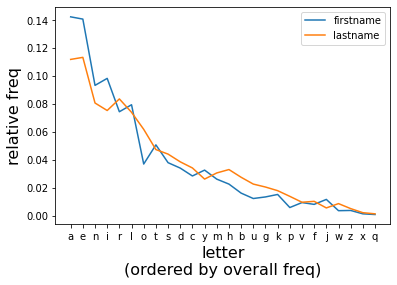

In [17]:
### BEGIN SOLUTION
plt.plot(df_count['firstname']/df_count['firstname'].sum(), label='firstname')
plt.plot(df_count['lastname']/df_count['lastname'].sum(), label='lastname')

plt.ylabel('relative freq', fontsize=16)
plt.xlabel('letter\n(ordered by overall freq)', fontsize=16)
plt.legend()
### END SOLUTION